In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Churn.csv to Bank_Churn.csv


In [4]:
df = pd.read_csv ("Bank_Churn.csv")


In [5]:
df.head()

RowNumber  CustomerId  CreditScore  GeographyID  GenderID  Age  Tenure  \
0          1    15634602          619            1         2   42       7   
1          2    15647311          608            2         2   41       4   
2          3    15619304          502            1         2   42       4   
3          4    15701354          699            1         2   39       3   
4          5    15737888          850            2         2   43       3   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited    Bank DOJ  
0       1  23-03-2016  
1       0  09-10-2018  
2       1  25-03-2019  
3       0  24-10-2019  
4       0  22-11-2019

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
CreditScore        0
GeographyID        0
GenderID           0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Bank DOJ           0
dtype: int64

In [7]:
df.describe()

RowNumber    CustomerId   CreditScore   GeographyID      GenderID  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800      1.749500      1.454300   
std     2886.89568  7.193619e+04     96.653299      0.830433      0.497932   
min        1.00000  1.556570e+07    350.000000      1.000000      1.000000   
25%     2500.75000  1.562853e+07    584.000000      1.000000      1.000000   
50%     5000.50000  1.569074e+07    652.000000      1.000000      1.000000   
75%     7500.25000  1.575323e+07    718.000000      3.000000      2.000000   
max    10000.00000  1.581569e+07    850.000000      3.000000      2.000000   

                Age       Tenure        Balance  NumOfProducts    HasCrCard  \
count  10000.000000  10000.00000   10000.000000   10000.000000  10000.00000   
mean      38.921800      4.86430   76485.889288       1.530200      0.70550   
std       10.487806      1.21525   62397.405202       0.581654      0.45584   
min       18.000000      3.00000       0.000000       1.000000      0.00000   
25%       32.000000      4.00000       0.000000       1.000000      0.00000   
50%       37.000000      5.00000   97198.540000       1.000000      1.00000   
75%       44.000000      6.00000  127644.240000       2.000000      1.00000   
max       92.000000      7.00000  250898.090000       4.000000      1.00000   

       IsActiveMember  EstimatedSalary        Exited  
count    10000.000000     10000.000000  10000.000000  
mean         0.515100    100090.239881      0.203700  
std          0.499797     57510.492818      0.402769  
min          0.000000        11.580000      0.000000  
25%          0.000000     51002.110000      0.000000  
50%          1.000000    100193.915000      0.000000  
75%          1.000000    149388.247500      0.000000  
max          1.000000    199992.480000      1.000000

In [8]:
df = df[['CustomerId', 'CreditScore', 'GeographyID', 'GenderID','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Bank DOJ','Exited']]

In [9]:
df.head()

CustomerId  CreditScore  GeographyID  GenderID  Age  Tenure    Balance  \
0    15634602          619            1         2   42       7       0.00   
1    15647311          608            2         2   41       4   83807.86   
2    15619304          502            1         2   42       4  159660.80   
3    15701354          699            1         2   39       3       0.00   
4    15737888          850            2         2   43       3  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Bank DOJ  \
0              1          1               1        101348.88  23-03-2016   
1              1          0               1        112542.58  09-10-2018   
2              3          1               0        113931.57  25-03-2019   
3              2          0               0         93826.63  24-10-2019   
4              1          1               1         79084.10  22-11-2019   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   GeographyID      10000 non-null  int64  
 3   GenderID         10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Bank DOJ         10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 1015.8+ KB


To check if dataset is balanced or imbalanced?

In [11]:
from datetime import datetime

# assuming your dataframe is named 'df', and the date format is 'dd-mm-yyyy'
df['Bank DOJ'] = df['Bank DOJ'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
df['total_number_of_days'] = (datetime(2020, 1, 1) - df['Bank DOJ']).dt.days


<ipython-input-11-21f182f1be6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bank DOJ'] = df['Bank DOJ'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))


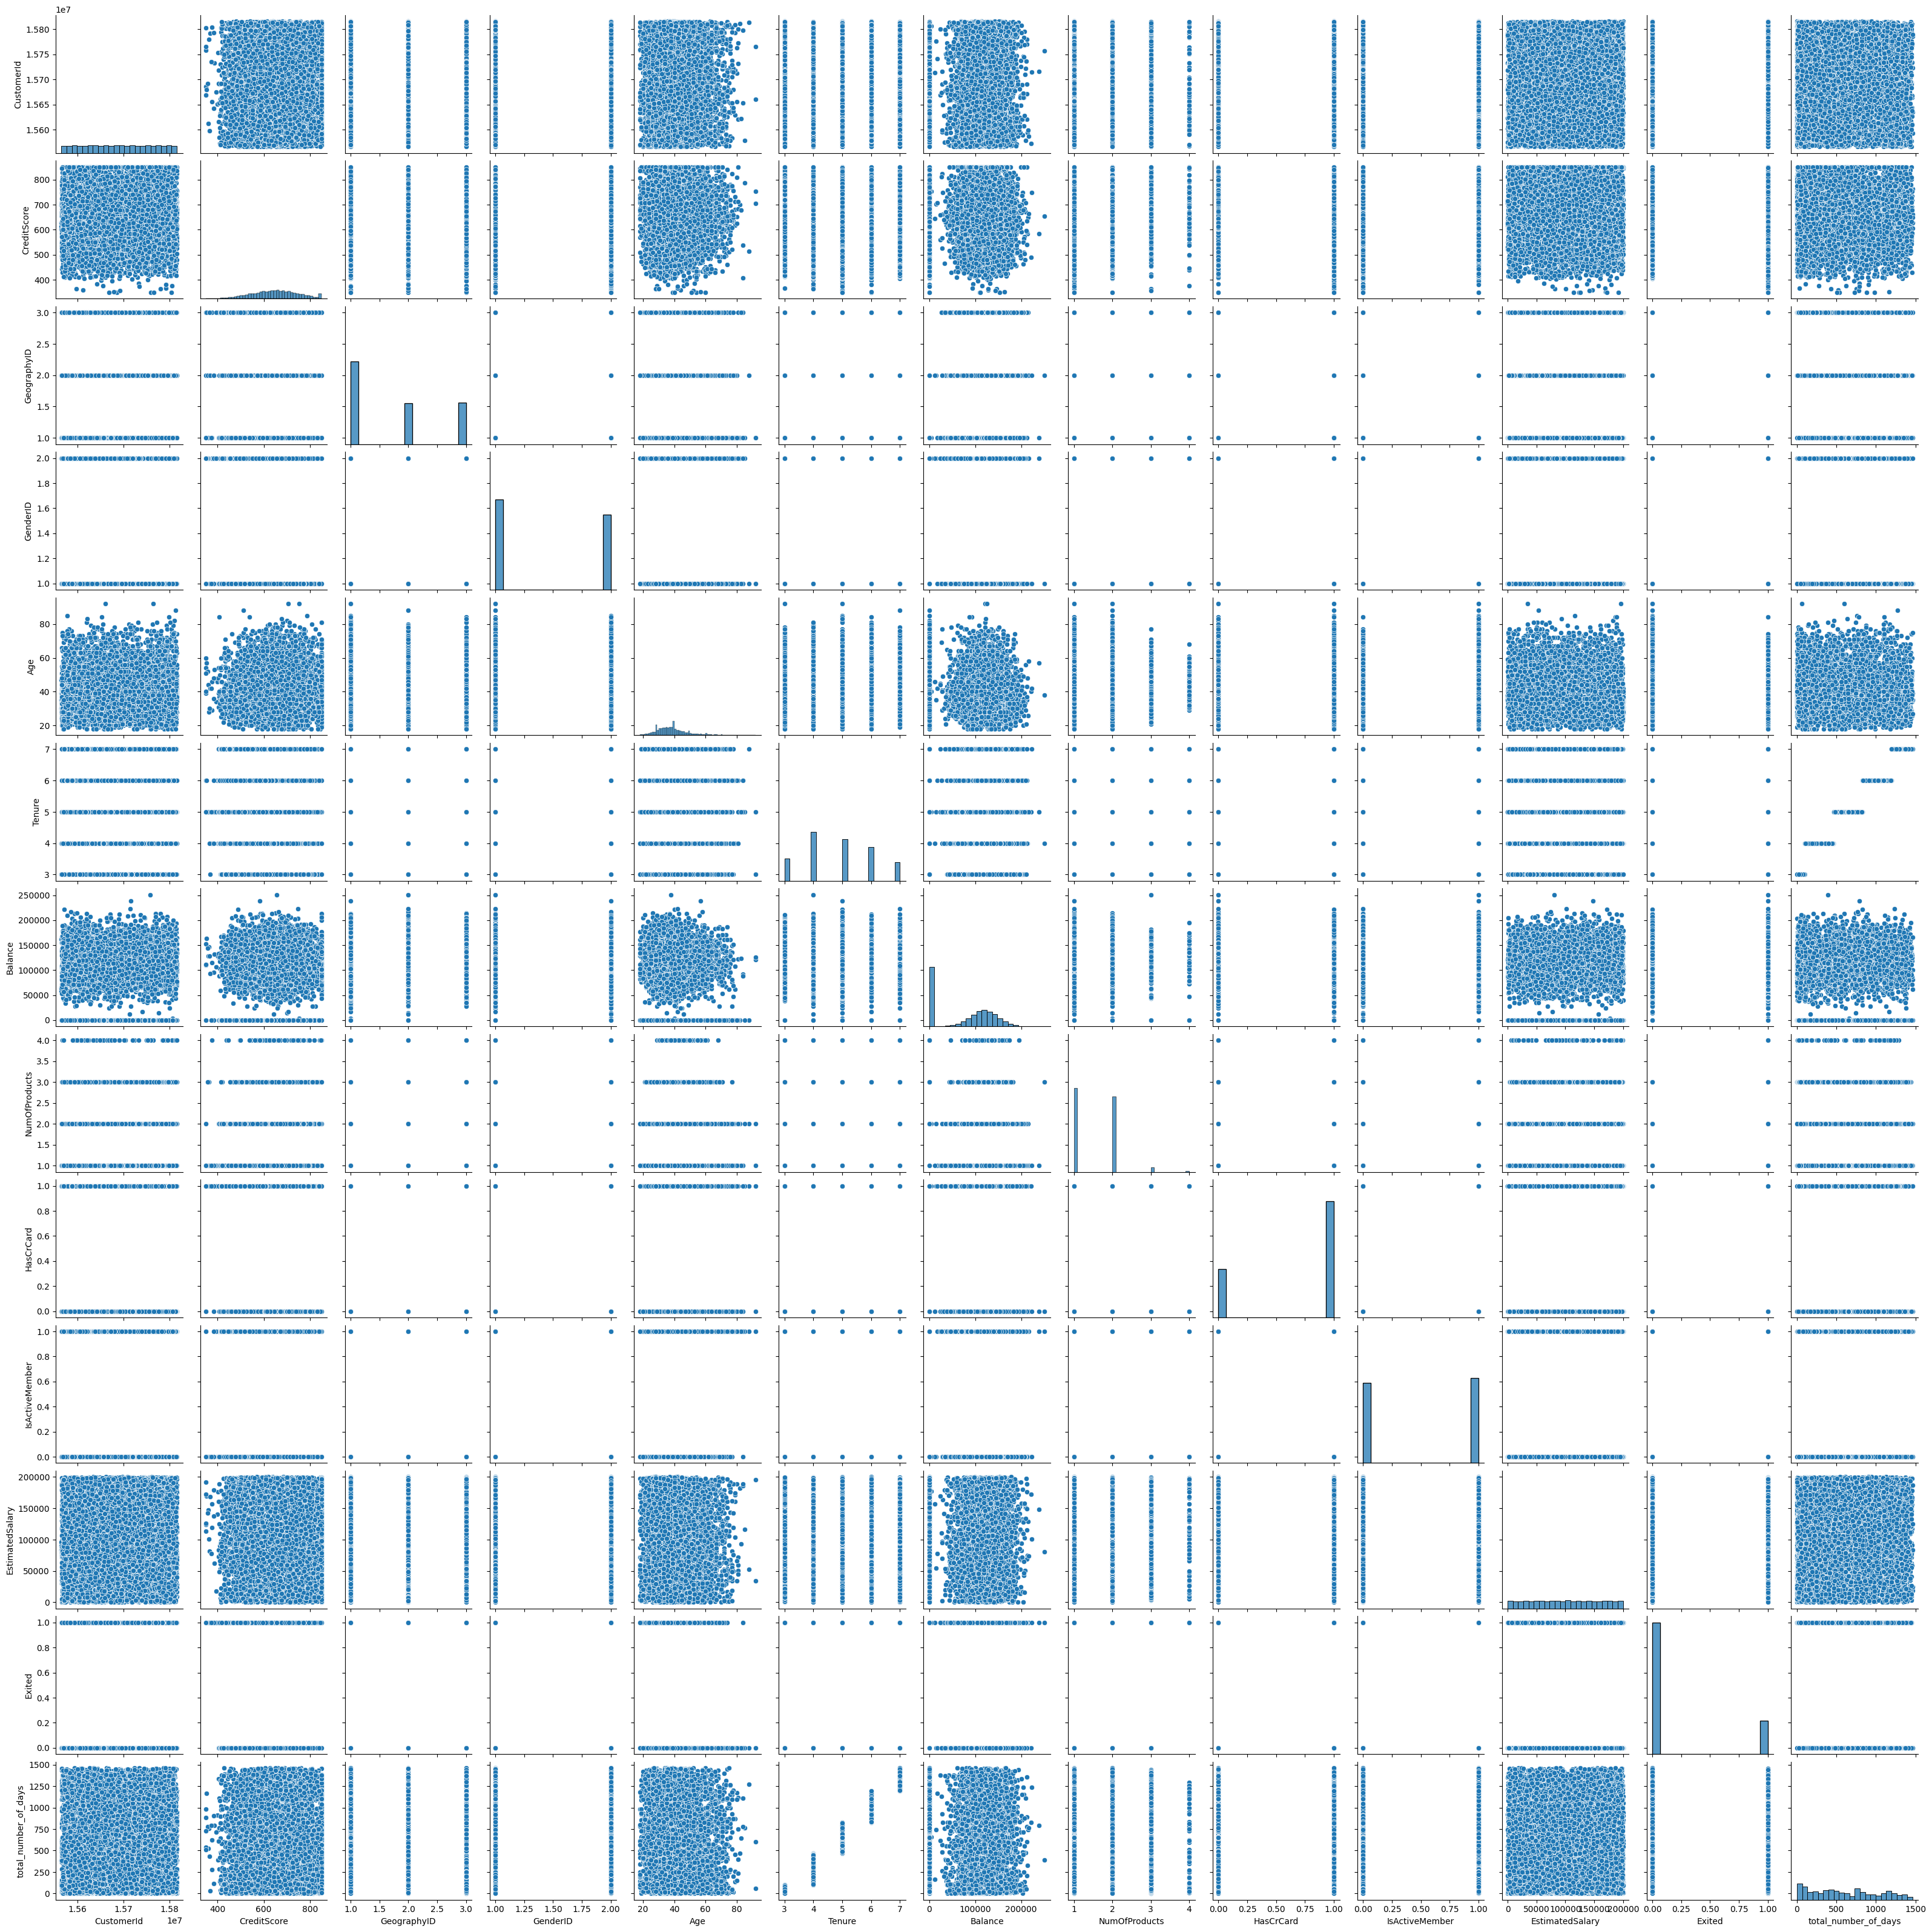

In [12]:
sns.pairplot(df)

In [13]:
df.head()

CustomerId  CreditScore  GeographyID  GenderID  Age  Tenure    Balance  \
0    15634602          619            1         2   42       7       0.00   
1    15647311          608            2         2   41       4   83807.86   
2    15619304          502            1         2   42       4  159660.80   
3    15701354          699            1         2   39       3       0.00   
4    15737888          850            2         2   43       3  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary   Bank DOJ  \
0              1          1               1        101348.88 2016-03-23   
1              1          0               1        112542.58 2018-10-09   
2              3          1               0        113931.57 2019-03-25   
3              2          0               0         93826.63 2019-10-24   
4              1          1               1         79084.10 2019-11-22   

   Exited  total_number_of_days  
0       1                  1379  
1       0                   449  
2       1                   282  
3       0                    69  
4       0                    40

In [14]:
count_0 = (df['Exited'] == 0).sum()
count_1 = (df['Exited'] == 1).sum()

# print the results
print(f"Number of rows with a value of 0: {count_0}")
print(f"Number of rows with a value of 1: {count_1}")

Number of rows with a value of 0: 7963
Number of rows with a value of 1: 2037


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerId            10000 non-null  int64         
 1   CreditScore           10000 non-null  int64         
 2   GeographyID           10000 non-null  int64         
 3   GenderID              10000 non-null  int64         
 4   Age                   10000 non-null  int64         
 5   Tenure                10000 non-null  int64         
 6   Balance               10000 non-null  float64       
 7   NumOfProducts         10000 non-null  int64         
 8   HasCrCard             10000 non-null  int64         
 9   IsActiveMember        10000 non-null  int64         
 10  EstimatedSalary       10000 non-null  float64       
 11  Bank DOJ              10000 non-null  datetime64[ns]
 12  Exited                10000 non-null  int64         
 13  total_number_of_d

In [16]:
df.drop('Bank DOJ', axis=1, inplace=True)

As we can see, Dataset is highly imbalanced. We can do oversampling to increase the target variable with '1'.

In [17]:
from imblearn.over_sampling import SMOTE

# separate the features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# combine the resampled features and target variable back into a dataframe
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

In [18]:
count_0 = (balanced_df['Exited'] == 0).sum()
count_1 = (balanced_df['Exited'] == 1).sum()

# print the results
print(f"Number of rows in balanced_df with a value of 0: {count_0}")
print(f"Number of rows in balanced_df with a value of 1: {count_1}")

Number of rows in balanced_df with a value of 0: 7963
Number of rows in balanced_df with a value of 1: 7963


<Axes: >

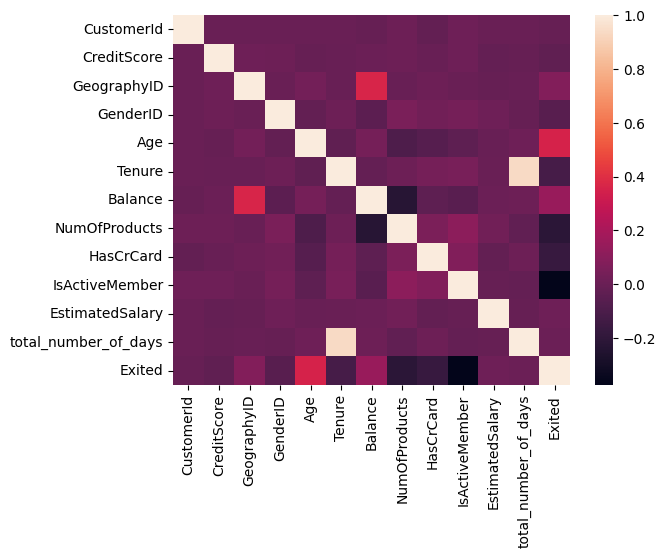

In [19]:
sns.heatmap(balanced_df.corr())

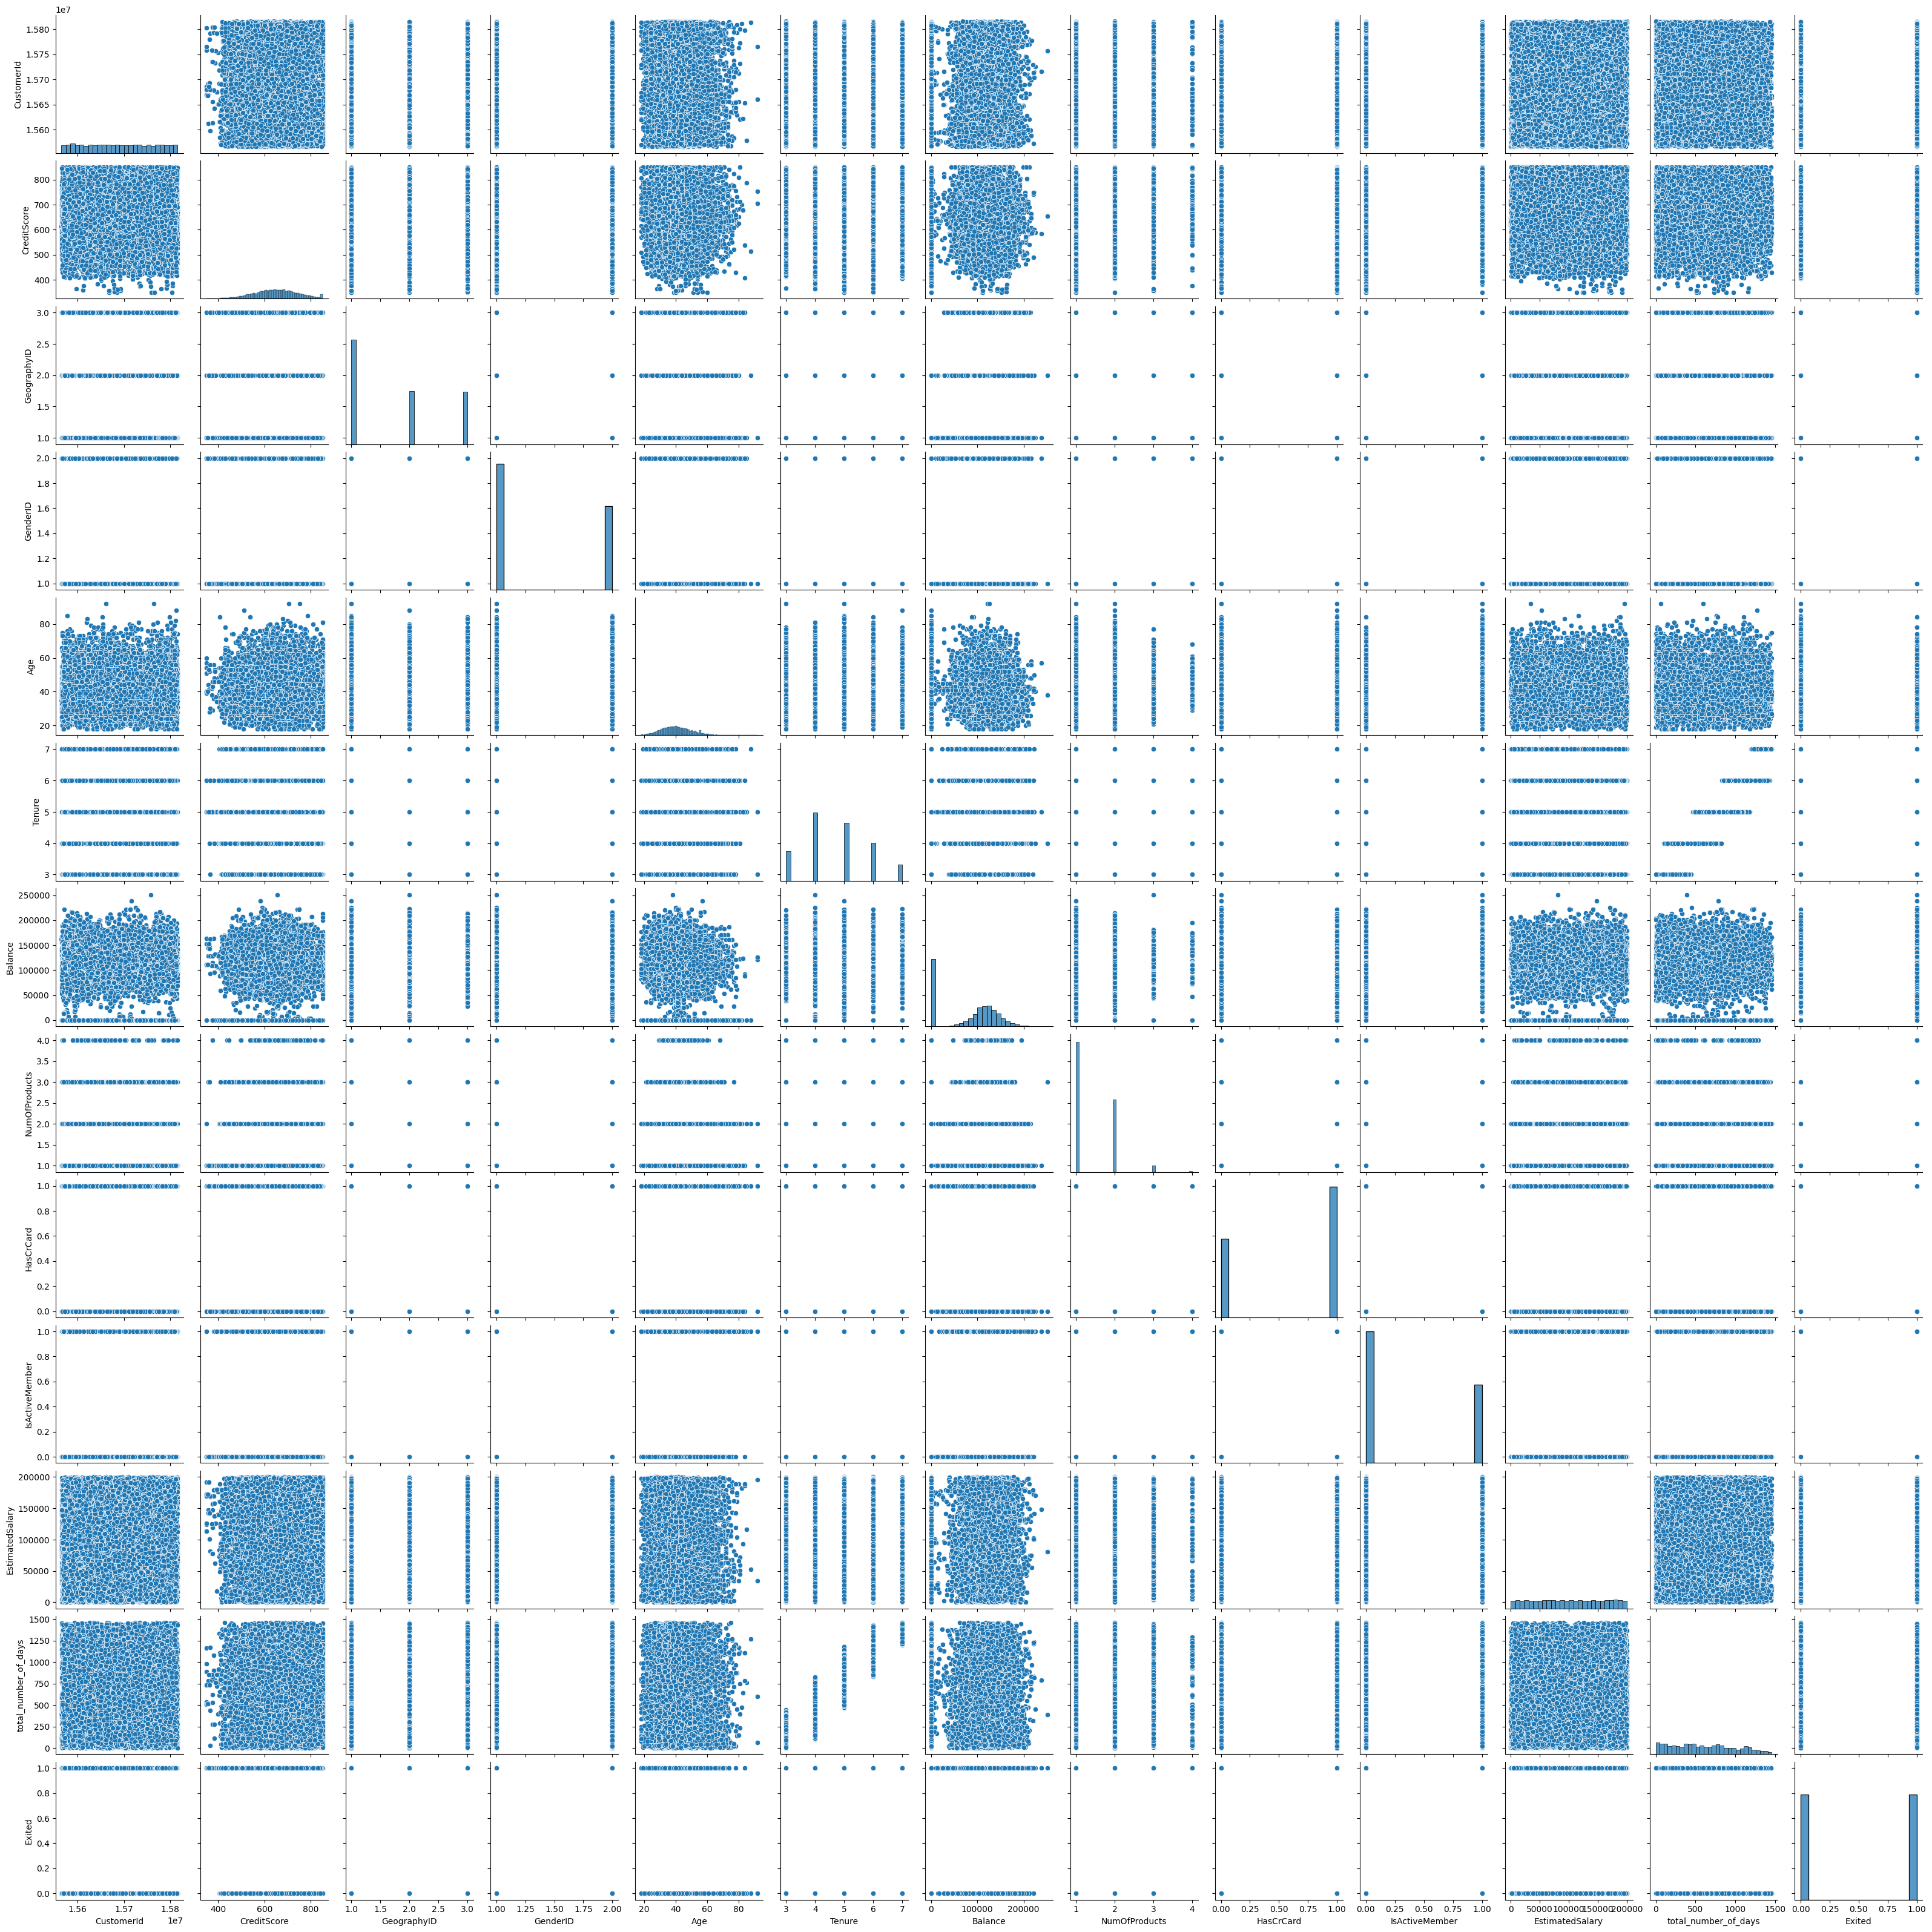

In [20]:
sns.pairplot(balanced_df)

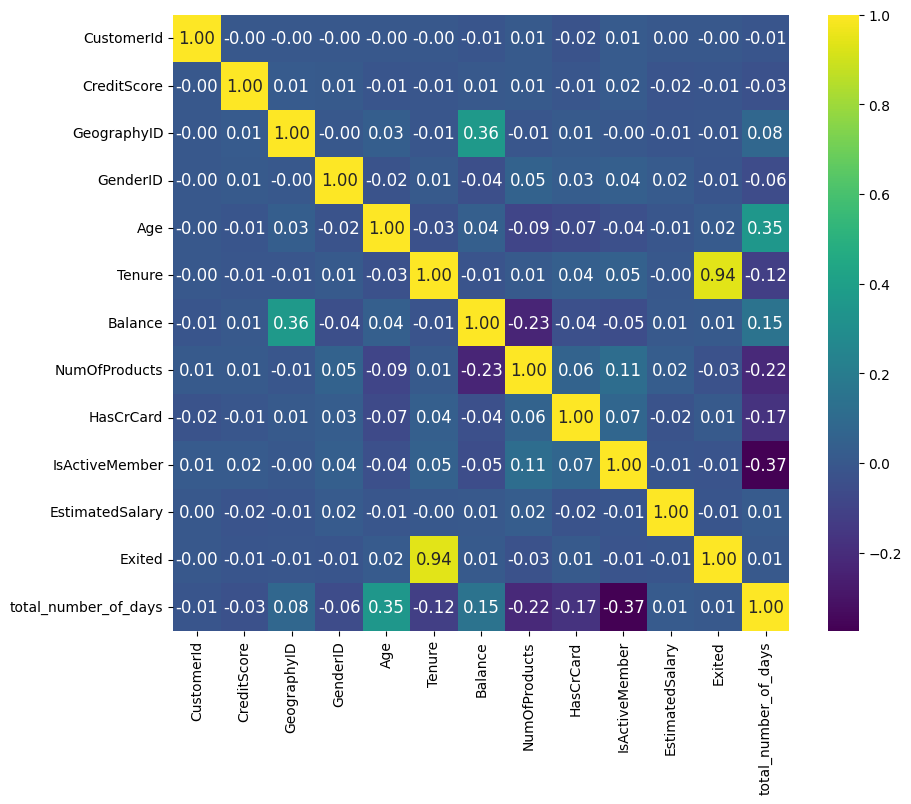

In [21]:
corrmat = balanced_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
corrmat = balanced_df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 12}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="viridis")
plt.show()


<Axes: xlabel='NumOfProducts', ylabel='Exited'>

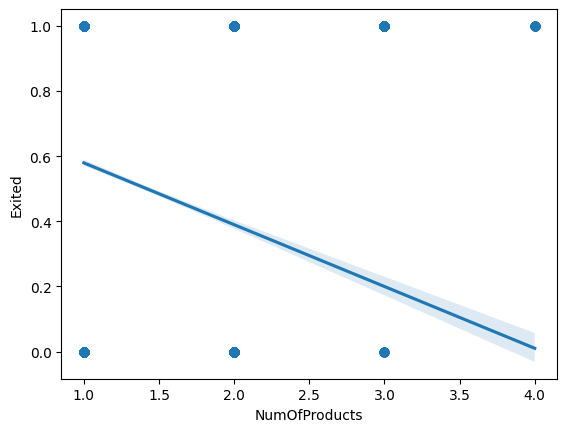

In [22]:
sns.regplot(x="NumOfProducts", y="Exited", data =balanced_df)

<Axes: xlabel='GeographyID', ylabel='Exited'>

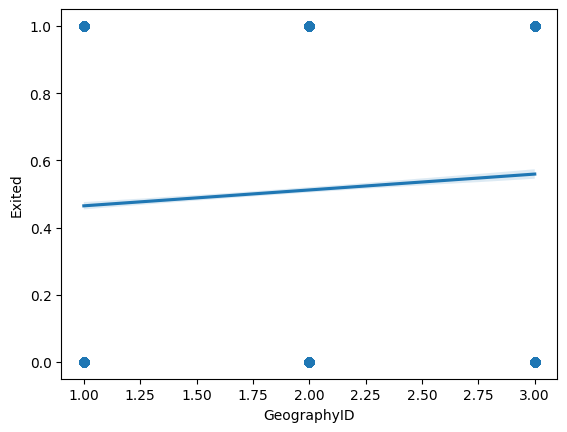

In [23]:
sns.regplot(x="GeographyID", y="Exited", data =balanced_df)

<Axes: xlabel='CreditScore', ylabel='Exited'>

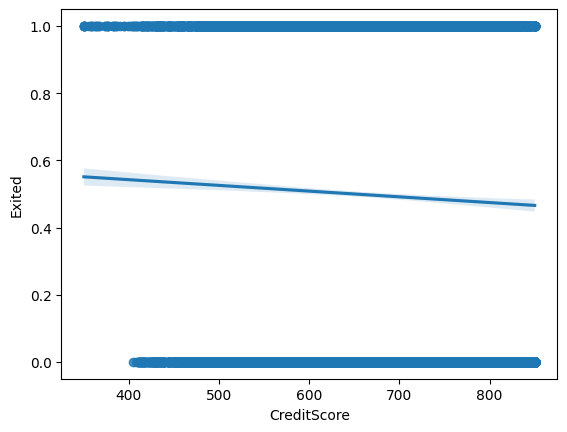

In [24]:
sns.regplot(x="CreditScore", y="Exited", data =balanced_df)

<Axes: xlabel='Age', ylabel='Exited'>

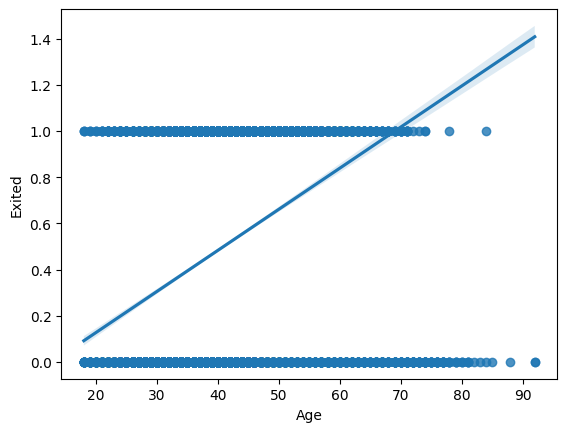

In [25]:
sns.regplot(x="Age", y="Exited", data =balanced_df)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            10000 non-null  int64  
 1   CreditScore           10000 non-null  int64  
 2   GeographyID           10000 non-null  int64  
 3   GenderID              10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Tenure                10000 non-null  int64  
 6   Balance               10000 non-null  float64
 7   NumOfProducts         10000 non-null  int64  
 8   HasCrCard             10000 non-null  int64  
 9   IsActiveMember        10000 non-null  int64  
 10  EstimatedSalary       10000 non-null  float64
 11  Exited                10000 non-null  int64  
 12  total_number_of_days  10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB


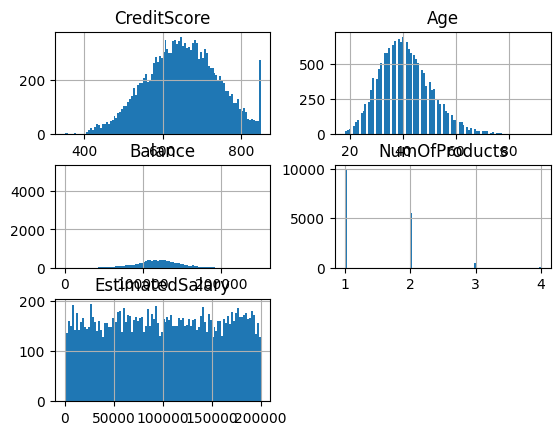

In [27]:

hist = balanced_df.hist(column=['CreditScore', 'Age','Balance','NumOfProducts','EstimatedSalary'], bins=100)

plt.show()


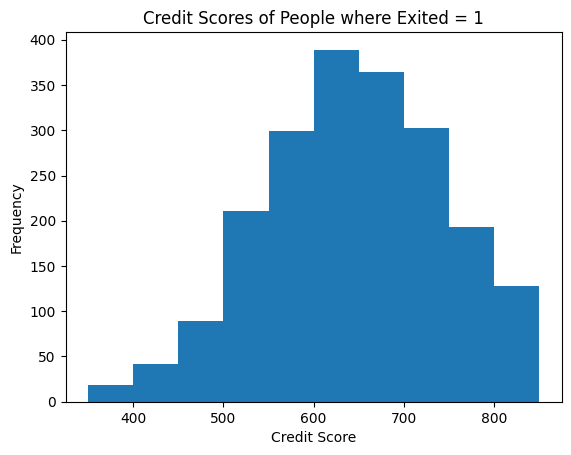

In [28]:


# Filter credit scores where existed == 1
credit_scores = df[df['Exited'] == 1]['CreditScore']

# Plot histogram
plt.hist(credit_scores, bins=10)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Credit Scores of People where Exited = 1')
plt.show()
# with below diagram we can see, More people opted to left where credit score is 600-650

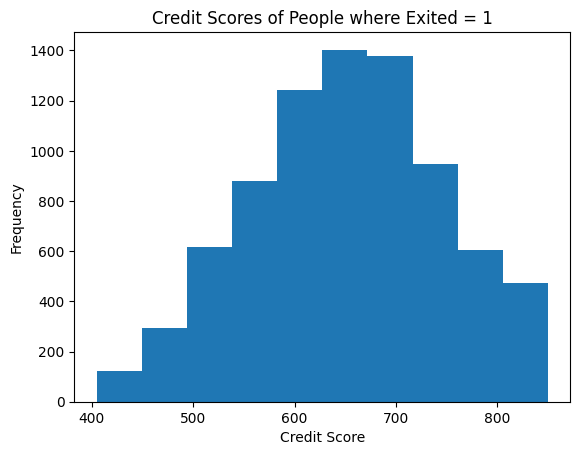

In [29]:
# Filter credit scores where existed == 1
credit_scores = df[df['Exited'] == 0]['CreditScore']

# Plot histogram
plt.hist(credit_scores, bins=10)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Credit Scores of People where Exited = 1')
plt.show()

#with below diagram shows people who opted to stay with bank. We can see the number is bigger for 650-750 range. We can see there is a trend that people leaving bank with credit score of 600-650.



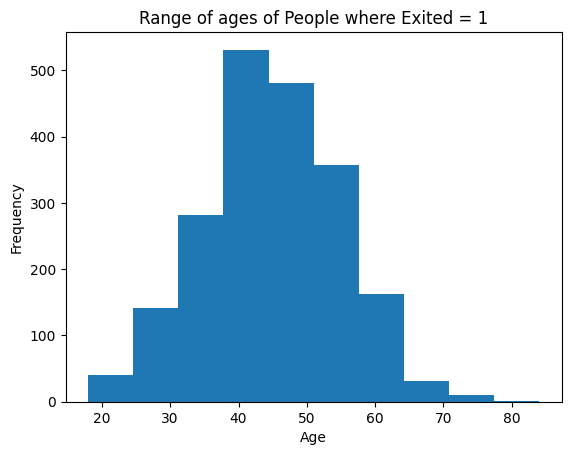

In [30]:
credit_scores = df[df['Exited'] == 1]['Age']

# Plot histogram
plt.hist(credit_scores, bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Range of ages of People where Exited = 1')
plt.show()

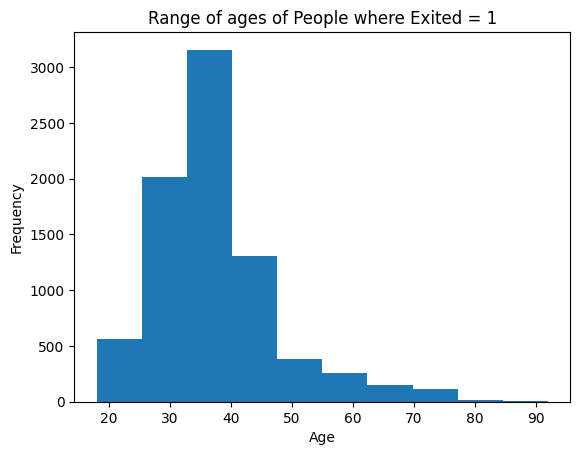

In [31]:
credit_scores = df[df['Exited'] == 0]['Age']

# Plot histogram
plt.hist(credit_scores, bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Range of ages of People where Exited = 1')
plt.show()

If we observe the distribution of age, it is clear that customers aged between 40 and 50 have a higher likelihood of migrating, whereas those below the age of 40 have a higher likelihood of retention.

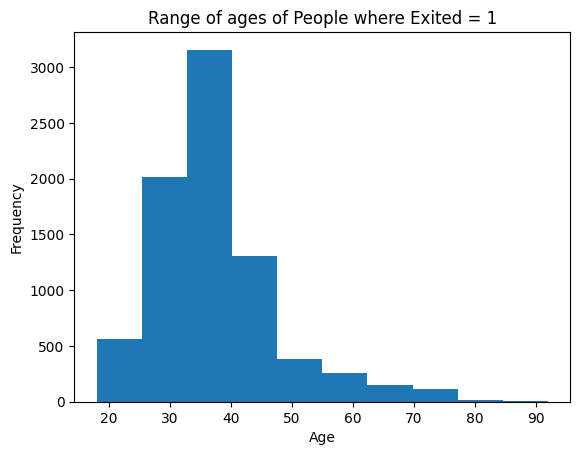

In [32]:
credit_scores = df[df['Exited'] == 0]['Age']

# Plot histogram
plt.hist(credit_scores, bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Range of ages of People where Exited = 1')
plt.show()

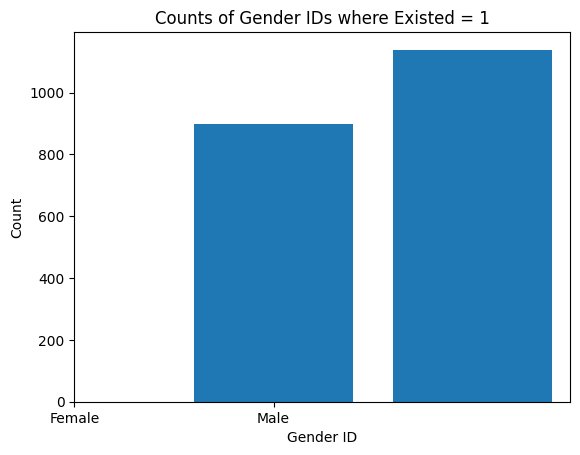

In [33]:


# Filter gender IDs where existed == 1
gender_counts = df[df['Exited'] == 1]['GenderID'].value_counts()

# Create a bar chart of gender counts
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender ID')
plt.ylabel('Count')
plt.title('Counts of Gender IDs where Existed = 1')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()



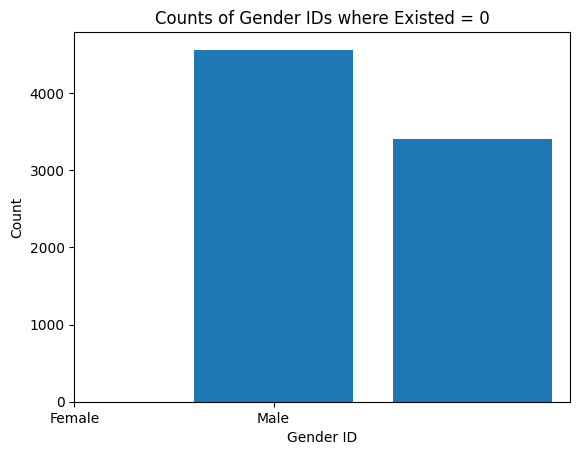

In [34]:
# Filter gender IDs where existed == 1
gender_counts = df[df['Exited'] == 0]['GenderID'].value_counts()

# Create a bar chart of gender counts
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender ID')
plt.ylabel('Count')
plt.title('Counts of Gender IDs where Existed = 0')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


If we observe the distribution of age, it is clear that male customers aged between 40 and 50 have a higher likelihood of migrating, whereas Female have a higher likelihood of retention.

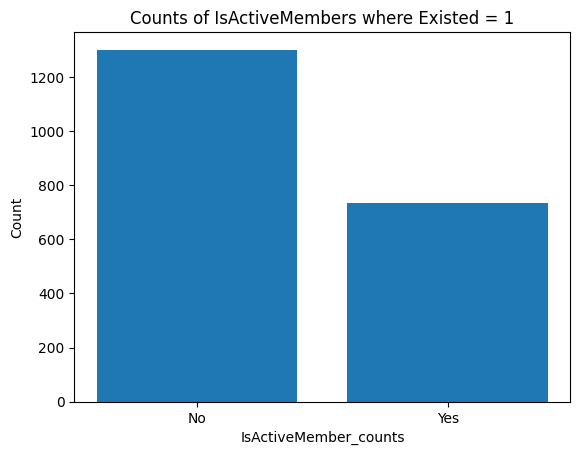

In [35]:



# Filter IsActiveMember where existed == 1
IsActiveMember_counts = df[df['Exited'] == 1]['IsActiveMember'].value_counts()

# Create a bar chart of gender counts
plt.bar(IsActiveMember_counts.index, IsActiveMember_counts.values)
plt.xlabel('IsActiveMember_counts')
plt.ylabel('Count')
plt.title('Counts of IsActiveMembers where Existed = 1')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


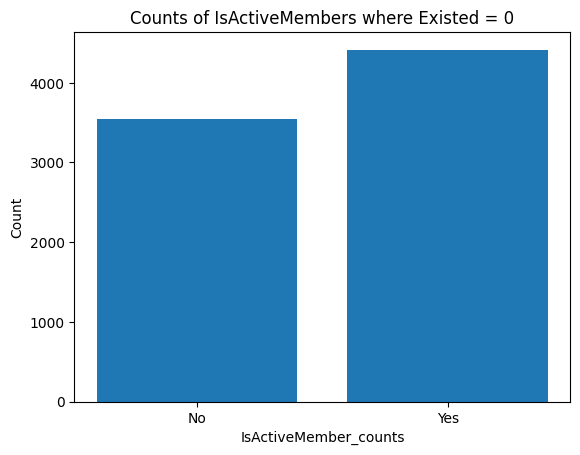

In [36]:
# Filter IsActiveMember where existed == 0
IsActiveMember_counts = df[df['Exited'] == 0]['IsActiveMember'].value_counts()

# Create a bar chart of gender counts
plt.bar(IsActiveMember_counts.index, IsActiveMember_counts.values)
plt.xlabel('IsActiveMember_counts')
plt.ylabel('Count')
plt.title('Counts of IsActiveMembers where Existed = 0')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


It clear from above graph that more in active members are leaving the bank

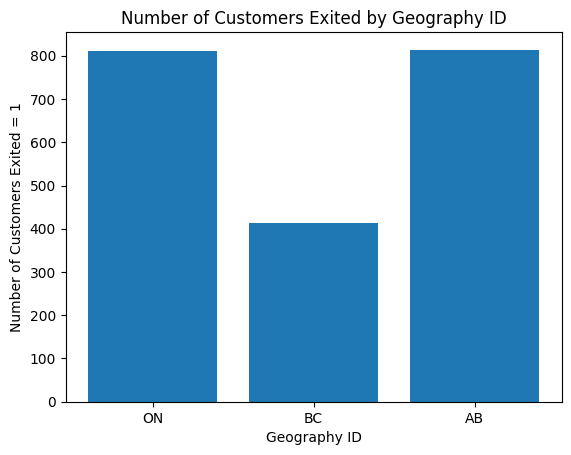

In [38]:
# Group data by GeographyID and sum Exited values where Exited = 1
exited_by_geography_id = df[df['Exited'] == 1].groupby('GeographyID')['Exited'].sum()

# Create bar plot
plt.bar(exited_by_geography_id.index, exited_by_geography_id.values)
plt.xlabel('Geography ID')
plt.ylabel('Number of Customers Exited = 1')
plt.title('Number of Customers Exited by Geography ID')
plt.xticks([1, 2, 3], ['ON', 'BC','AB']) # set x-axis ticks to match the geography IDs
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
balanced_df.columns


Index(['CustomerId', 'CreditScore', 'GeographyID', 'GenderID', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'total_number_of_days', 'Exited'],
      dtype='object')

In [40]:
# split the dataframe into input features (X) and output variable (y)
X = balanced_df[['CreditScore','GeographyID','GenderID','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','total_number_of_days']]
y = balanced_df['Exited']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

In [43]:
y_test.shape

(3186,)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
# create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# fit the classifier to the training data
knn.fit(X_train, y_train)

# predict the class labels for the test set
y_pred = knn.predict(X_test)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.5951035781544256
Precision: 0.5757052389176741
Recall: 0.6439150032195751
F1 Score: 0.60790273556231


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression object and fit the training data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.655367231638418
Precision: 0.6398279041180086
Recall: 0.6703155183515775
F1 Score: 0.6547169811320755


In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Gaussian Naive Bayes object and fit the training data
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7146892655367232
Precision: 0.6867749419953596
Recall: 0.7623953638119768
F1 Score: 0.7226121452548062


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Decision Tree Classifier object and fit the training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.77338355304457
Precision: 0.7592014971927635
Recall: 0.7836445589182228
F1 Score: 0.7712294043092521


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest Classifier object and fit the training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.854676710608914
Precision: 0.8471337579617835
Recall: 0.8564069542820347
F1 Score: 0.8517451168747998


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create a Gradient Boosting Classifier object and fit the training data
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8339610797237916
Precision: 0.8363994743758213
Recall: 0.819703799098519
F1 Score: 0.8279674796747967
